## MNIST 手寫數字辨識 (MINST_Softmax_Keras)
2017/07/02  
徐仕杰

## Outline

-  [Import Package & Functions](#import) 
-  [1. 先把MNIST資料讀進來](#先把MNIST資料讀進來) 
-  [2. 開始Machine Learning - Softmax regression](#開始Machine Learning)  
  -  [A. 定義參數](#定義參數) 
  -  [B. 設計一個Model從X預測Y](#設計一個) 
  -  [C. 選一個loss function,](#選一個loss) 
  -  [D. 選一個optimizer](#選一個optimizer) 
  -  [E. 開始執行訓練](#開始執行) 
  -  [F. 算一下正確率](#算一下正)  


<a id='import'></a>
## Import Package & Functions

In [8]:
import os
from PIL import Image
import numpy as np
import lzma
import pickle
from IPython.display import SVG, display

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import model_to_dot

os.environ['KERAS_BACKEND']='tensorflow'
#os.environ['KERAS_BACKEND']='theano'
#os.environ['THEANO_FLAGS']='floatX=float32, device=cuda'

In [57]:
def showX(X):
    int_X = (X*255).clip(0,255).astype('uint8')
    # N*784 -> N*28*28 -> 28*N*28 -> 28 * 28N
    int_X_reshape = int_X.reshape(-1,28,28).swapaxes(0,1).reshape(28,-1)
    display(Image.fromarray(int_X_reshape))

<a id='先把MNIST資料讀進來'></a>
## 1. 先把MNIST資料讀進來
- Training Data: 訓練Model
- Validataion Data: 訓練Model的時候, 同步監控目前模型的好壞
- Testing Data: 訓練結束後, 評估模型的好壞  
<br>
- Label要轉成one-hot格式

In [6]:
with lzma.open("mnist.pkl.xz", 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

train_X, train_y = train_set
validation_X, validation_y = validation_set
test_X, test_y = test_set

#把Y label變成one-hot representation¶
train_Y = np.eye(10)[train_y]
test_Y = np.eye(10)[test_y]
validation_Y = np.eye(10)[validation_y]

<a id='開始Machine Learning'></a>
## 2. 開始Machine Learning - Softmax regression
-  [A. 定義參數](#) 
-  [B. 設計一個Model從X預測Y](#) 
-  [C. 選一個cost/loss function,](#) 
-  [D. 選一個optimizer](#) 
-  [E. 開始執行訓練](#) 
-  [F. 算一下正確率](#)  


<a id='定義參數'></a>
### A. 定義參數
- Keras不用先定義X,Y, W, B這些參數

<a id='設計一個'></a>
### B. 設計一個Model從X預測Y  ($Y = softmax(WX+B)$)
- 簡單回歸 $Y_t = WX+B$
- softmax迴歸(logistic迴歸) $ Y =softmax(Y_t)$

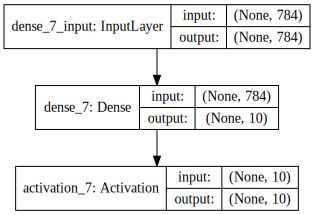

In [46]:
#model = Sequential()
#model.add(Dense(units=10, input_dim=784)) #units是輸出的維度, input_dim是輸入維度
#model.add(Activation('relu'))
#model.add(Dense(units=10, input_dim=100)) #units是輸出的維度, input_dim是輸入維度
#model.add(Activation('softmax'))
model = Sequential()
model.add(Dense(units=10, input_dim=784))
model.add(Activation('softmax'))
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

<a id='選一個loss'></a>
###  C. 選一個loss function, 當作Machine learning的目標
- Available loss functions
https://keras.io/losses/  

<a id='選一個optimizer'></a>
### D. 選一個optimizer, 根據Data和我們訂的目標找參數W, B
- Avaliable optimizer
https://keras.io/optimizers/

In [47]:
model.compile(loss='categorical_crossentropy',  
              optimizer='sgd',
              metrics=['accuracy'])

<a id='開始執行'></a>
### E. 開始執行訓練

In [53]:
model.fit(x=train_X, y=train_Y, validation_data=(validation_X, validation_Y), batch_size=50, epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s - loss: 0.9862 - acc: 0.7674 - val_loss: 0.5773 - val_acc: 0.8706
Epoch 2/10
50000/50000 [==============================] - 2s - loss: 0.5538 - acc: 0.8625 - val_loss: 0.4558 - val_acc: 0.8899
Epoch 3/10
50000/50000 [==============================] - 2s - loss: 0.4742 - acc: 0.8765 - val_loss: 0.4087 - val_acc: 0.8961
Epoch 4/10
50000/50000 [==============================] - 2s - loss: 0.4352 - acc: 0.8836 - val_loss: 0.3818 - val_acc: 0.9014
Epoch 5/10
50000/50000 [==============================] - 2s - loss: 0.4111 - acc: 0.8892 - val_loss: 0.3651 - val_acc: 0.9042
Epoch 6/10
50000/50000 [==============================] - 2s - loss: 0.3942 - acc: 0.8927 - val_loss: 0.3525 - val_acc: 0.9062
Epoch 7/10
50000/50000 [==============================] - 2s - loss: 0.3815 - acc: 0.8958 - val_loss: 0.3434 - val_acc: 0.9083
Epoch 8/10
50000/50000 [==============================] - 2s 

<a id='算一下正'></a>
### F. 算一下正確率Accuracy
- testing data

In [59]:
# 預測看看測次資料 test_X 前 20 筆
print('predict:',model.predict_classes(test_X[:20]))
showX(test_X[:20])
# 對答案
print('answer:',test_y[:20])

20/20 [==============================] - 0s
predict: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


answer: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [55]:
# 看看 test accuracy
loss, acc = model.evaluate(test_X, test_Y)
print('\nAccuracy:',acc)

 8736/10000 [=========================>....] - ETA: 0s
Accuracy: 0.9103
